### Name: Mohammad Mohammadi
### StudentId: 402208592

# Librarires

In [9]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing

# Load Dataset

In [10]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [11]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            self.labels = self._assign_clusters(X)
            new_centroids = self._calculate_centroids(X)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
    
    def _assign_clusters(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return np.argmin(distances, axis=1)
    
    def _calculate_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = X[self.labels == i].mean(axis=0)
        return centroids
    
    def predict(self, X):
        return self._assign_clusters(X)

# Use elbow method and silhouette method to choose optimal cluster numbers

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def elbow_method(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        distortions.append(np.sum((X - kmeans.centroids[kmeans.predict(X)])**2))
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

def silhouette_method(X, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.predict(X))
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal k')
    plt.show()


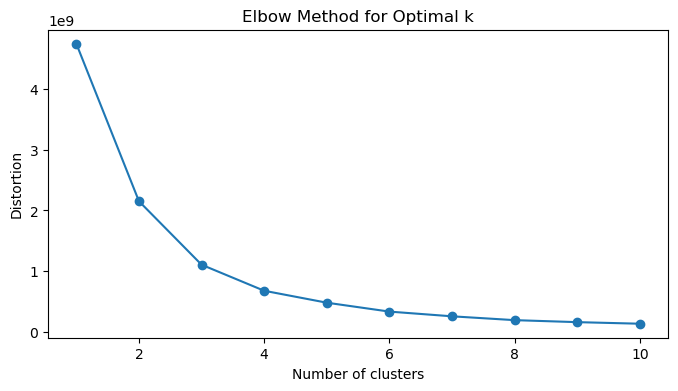

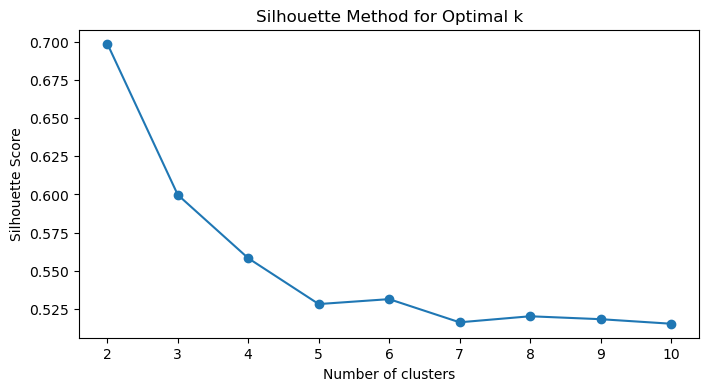

In [13]:
elbow_method(x_data)
silhouette_method(x_data)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

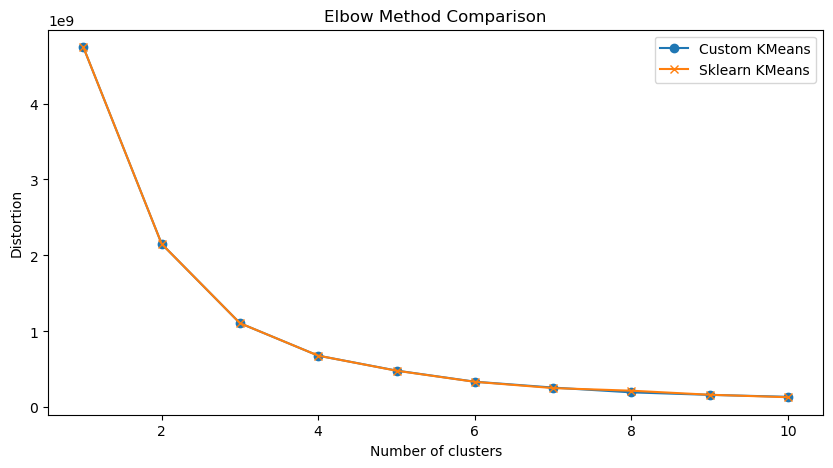

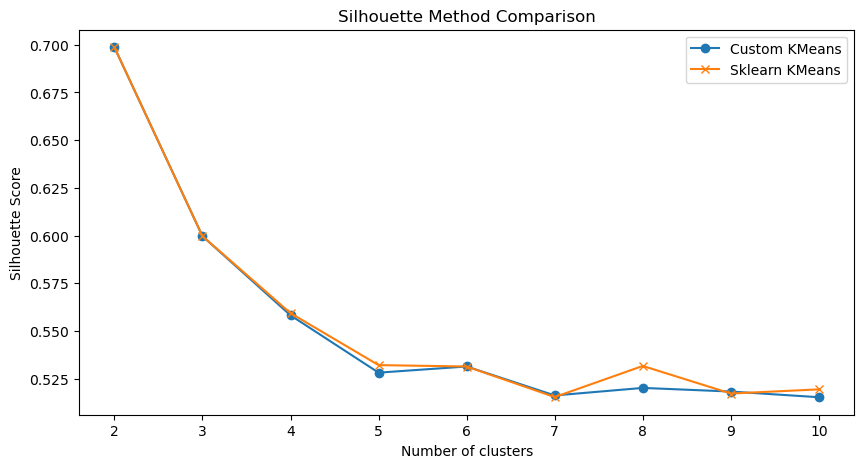

In [14]:
from sklearn.cluster import KMeans as SklearnKMeans

def elbow_method_comparison(X, max_clusters=10):
    distortions_custom = []
    distortions_sklearn = []
    
    for i in range(1, max_clusters+1):
        kmeans_custom = KMeans(n_clusters=i)
        kmeans_custom.fit(X)
        distortions_custom.append(np.sum((X - kmeans_custom.centroids[kmeans_custom.predict(X)])**2))
        
        kmeans_sklearn = SklearnKMeans(n_clusters=i, max_iter=1000)
        kmeans_sklearn.fit(X)
        distortions_sklearn.append(kmeans_sklearn.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters+1), distortions_custom, marker='o', label='Custom KMeans')
    plt.plot(range(1, max_clusters+1), distortions_sklearn, marker='x', label='Sklearn KMeans')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method Comparison')
    plt.legend()
    plt.show()
    
def silhouette_method_comparison(X, max_clusters=10):
    silhouette_scores_custom = []
    silhouette_scores_sklearn = []
    
    for i in range(2, max_clusters+1):
        kmeans_custom = KMeans(n_clusters=i)
        kmeans_custom.fit(X)
        score_custom = silhouette_score(X, kmeans_custom.predict(X))
        silhouette_scores_custom.append(score_custom)
        
        kmeans_sklearn = SklearnKMeans(n_clusters=i, max_iter=1000)
        kmeans_sklearn.fit(X)
        score_sklearn = silhouette_score(X, kmeans_sklearn.labels_)
        silhouette_scores_sklearn.append(score_sklearn)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters+1), silhouette_scores_custom, marker='o', label='Custom KMeans')
    plt.plot(range(2, max_clusters+1), silhouette_scores_sklearn, marker='x', label='Sklearn KMeans')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method Comparison')
    plt.legend()
    plt.show()

elbow_method_comparison(x_data)
silhouette_method_comparison(x_data)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

For the Elbow Method, from the comparison graph, we see that the distortion decreases sharply up to 3 clusters and then starts to level off more gradually. Both the custom KMeans and sklearn KMeans algorithms show a similar trend, with no significant difference between the two.

The optimal number of clusters, choosing based on elbow method, appears to be around 3 clusters for both custom and sklearn KMeans algorithms since that’s where the distortion curve starts to bend and level off.

For the Silhouette Method, from the comparison graph, we see that the silhouette score is highest at 2 clusters for both algorithms. The score decreases as the number of clusters increases, and the trend is consistent between the custom KMeans and sklearn KMeans algorithms.

The optimal number of clusters according to the silhouette method is 2 clusters for both custom and sklearn KMeans algorithms because that’s where the silhouette score is highest.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

Well adding to your thought, while the elbow method shows a clear "elbow" point around 3 clusters, the silhouette method suggests 2 clusters based on the highest score.

Given the preference for the silhouette method, as it provides a more deterministic approach by maximizing the average silhouette score, it would be more reliable in determining the optimal cluster number in this case. The silhouette method also gives a clearer interpretation of how well the clusters are separated, as opposed to the elbow method where determining the "elbow" point can sometimes be ambiguous.

In overall, I agree with your preference for the silhouette method because it provides a clear and quantitative measure of cluster validity, making it easier to determine the optimal number of clusters without ambiguity.